In [2]:
# Source from https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# Importing Python Dependencies
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("BTC.xlsx")

In [3]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2020-04-26 00:00:00'))

In [4]:
df = df.sort_values('Date')
df.isnull().sum()

Date        0
USDPrice    0
IDRPrice    0
dtype: int64

In [5]:
df = df.groupby('Date').sum().reset_index()

In [6]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-08', '2015-01-11',
               '2015-01-14', '2015-01-17', '2015-01-20', '2015-01-23',
               '2015-01-26', '2015-01-29',
               ...
               '2020-03-30', '2020-04-02', '2020-04-05', '2020-04-08',
               '2020-04-11', '2020-04-14', '2020-04-17', '2020-04-20',
               '2020-04-23', '2020-04-26'],
              dtype='datetime64[ns]', name='Date', length=647, freq=None)

In [66]:
y = df['IDRPrice'].resample('MS').mean()

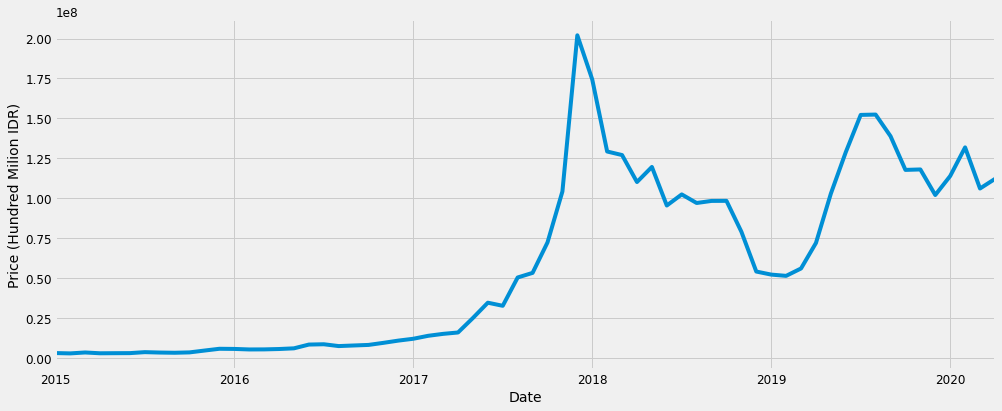

In [67]:
y.plot(figsize=(15, 6))
plt.ylabel('Price (Hundred Milion IDR)')
plt.show()

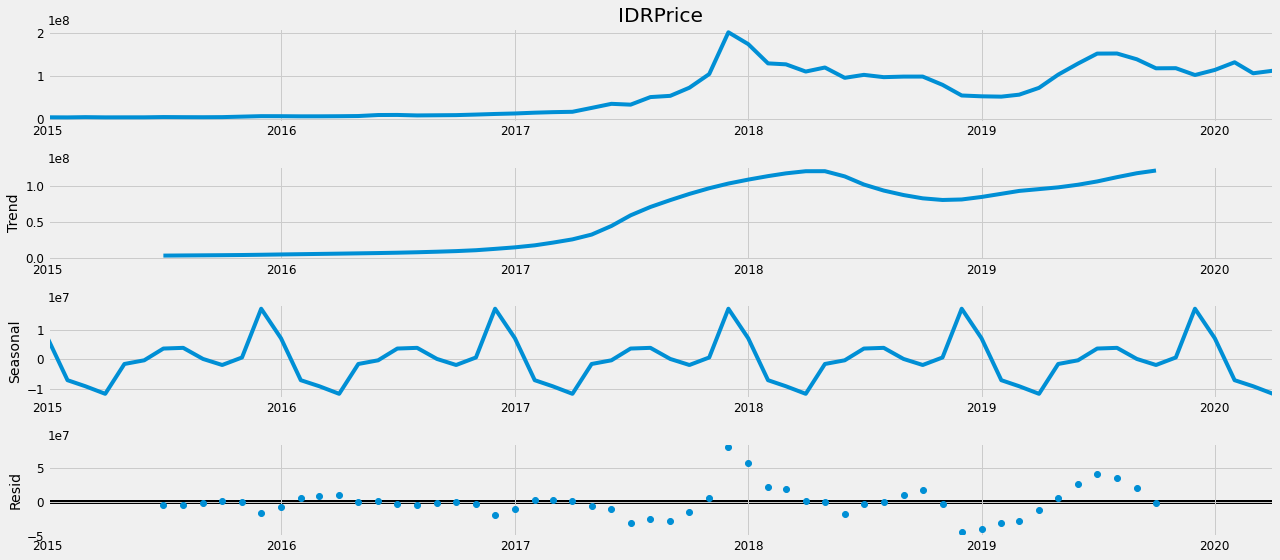

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()

plt.show()


In [70]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA ...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA ...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


In [71]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y,
                order = param,
                seasonal_order = param_seasonal,
                enforce_stationarity = False,
                enforce_invertibility = False
            )
            results = mod.fit(maxiter=200)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2475.256061901999
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2011.0145598005813
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1983.2730521996957
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1534.5149226780088
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2021.4130816240533
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1978.0787405440547
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1561.1259699721336
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1550.4428941868994
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2393.8206277013046
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1933.0964673936448
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1908.0946954100534
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1456.0823649385468
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2006.5869547487694
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1930.5675177943924
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1530.6698033586003
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1457.2868299161564
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.621316747754
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1837.48449329

D:\Jawad\Pyton\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1900.1115683529797
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1440.7985303267185
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1865.656161113162
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1865.5924477032509
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1455.1400464779313
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1442.7357196778273
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2252.491704009953
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1829.337601375074
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1861.288555045422
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1405.371710734443
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1865.4365447188063
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1830.0888530868465
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1455.0760790177474
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1407.3649752703186
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2251.062802435031
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1827.7689152641149
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1863.3866292669072
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1403.971392642395

In [72]:
mod = sm.tsa.statespace.SARIMAX(
    y,
    order = (1, 1, 1),
    seasonal_order = (1, 1, 0, 12),
    enforce_stationarity = False,
    enforce_invertibility = False
)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8390      0.118     -7.122      0.000      -1.070      -0.608
ma.L1          1.0171      0.023     44.413      0.000       0.972       1.062
ar.S.L12      -0.5241      0.108     -4.850      0.000      -0.736      -0.312
sigma2      8.739e+14        nan        nan        nan         nan         nan


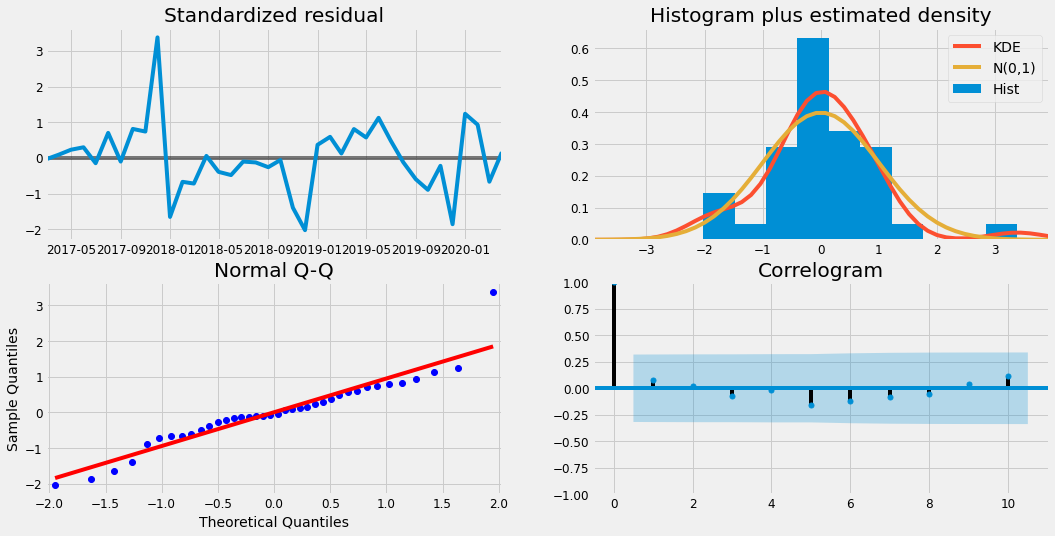

In [73]:
results.plot_diagnostics(figsize = (16, 8))
plt.show()

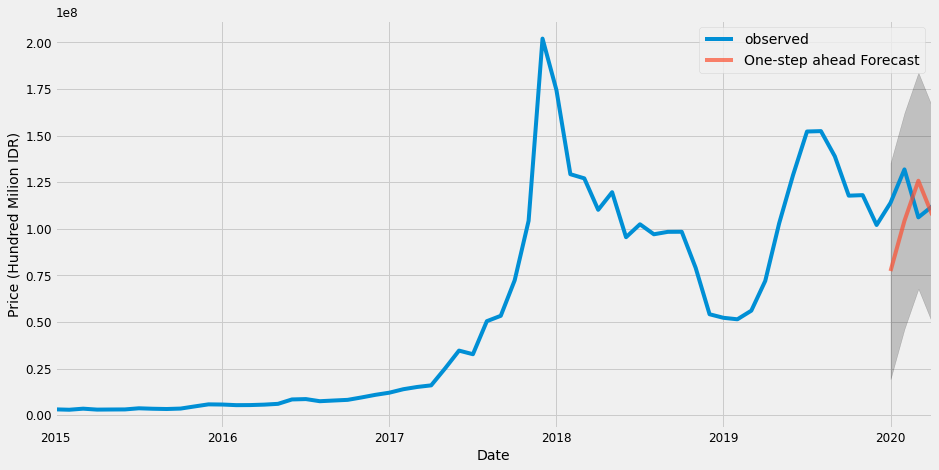

In [74]:
pred = results.get_prediction(start = pd.to_datetime('2020-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2009':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Price (Hundred Milion IDR)')

plt.legend()
plt.show()

In [75]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 627505893352474.5
The Root Mean Squared Error of our forecasts is 25050067.73


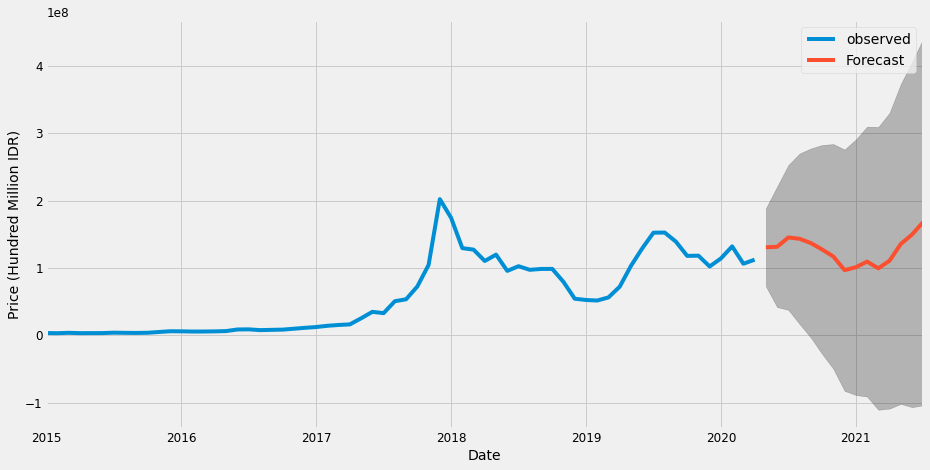

In [82]:
pred_uc = results.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color = 'k',
    alpha = .25
)
ax.set_xlabel('Date')
ax.set_ylabel('Price (Hundred Million IDR)')

plt.legend()
plt.show()